In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [2]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
from   PIL import Image
from   torchvision.utils import make_grid

from   data import GTExConfig, GTExDataset
from   models import DPCCA

In [3]:
cfg = GTExConfig()
cfg.PCCA_Z_DIM = 100

dataset = GTExDataset(cfg)

In [4]:
path = 'experiments/20181014_celebaae28_1000x1000/'\
       'gtex_mode-ccaae_latent_dim-100_seed-0_lr-0.0001/model.pt'
    
state = torch.load(path, map_location={'cuda:0': 'cpu'})
model = DPCCA(cfg)
model.load_state_dict(state)

torch.Size([166, 18659])
torch.Size([166, 3, 28, 28])


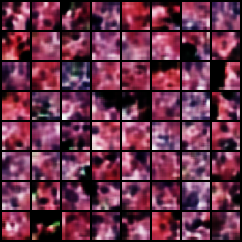

In [13]:
inds  = (dataset.tissues == 'Pancreas').astype(int)
inds  = torch.Tensor(inds).byte()
genes = dataset.genes[inds]
print(genes.shape)

x1 = model.sample_images_from_genes(genes).detach()

images = torch.Tensor(x1.shape[0], 3, 28, 28)
for i in range(len(images)):
    image = x1[i]
    images[i] = image

print(images.shape)
x = make_grid(images[:64], 8)
x = (x.numpy() * 255).astype('uint8')
Image.fromarray(x.T)

-0.031010189404090244 0.13493099311987558


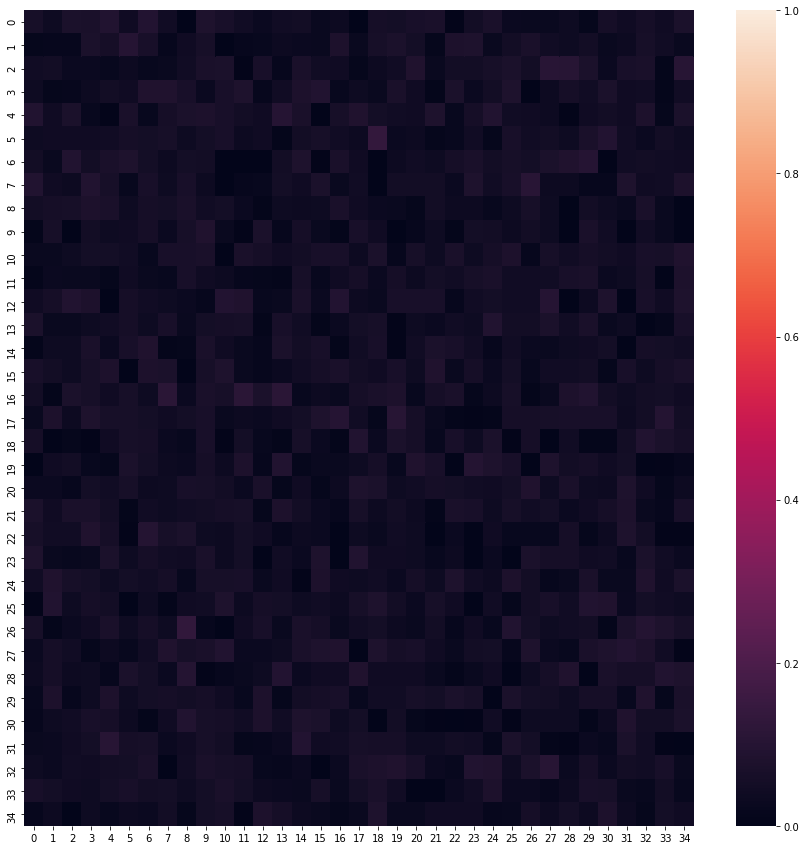

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
heatmap = np.array(heatmap)

import seaborn as sns
from   astropy.convolution import convolve
from   astropy.convolution.kernels import Gaussian2DKernel

print(heatmap.min(), heatmap.max())
ax = sns.heatmap(heatmap, vmin=0, vmax=1)